In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import shap

import events_package.utils as utils
from events_package.Experiment import Experiment
from events_package.config import FIVE_LAYERS
from events_package.input_getters import get_Y_1, get_X_3, get_X_4, get_X_5

In [2]:
Experiment.__version__

'5.0'

# 1. Importing Single Particle Data

## 1.1 Electrons

In [3]:
# importing data
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Electron\Parquet\1m_electron_pq_3"
)

electrons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
electrons.length

444840

In [4]:
electrons.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 434998
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 434998


## 1.2 Photons

In [5]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Photon\Parquet\1m_photon_pq"
)

photons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
photons.length

444142

In [6]:
photons.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 434870
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 434870


## 1.3 Neutral Pions

In [7]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiZero\Parquet\pq_pi0_2"
)

pi0 = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi0.length

412856

In [8]:
pi0.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 391483
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 391483


## 1.4 Charged Pions

In [9]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiPlusMinus\Parquet\pq_piplusminus_2"
)

pi_char = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi_char.length

357554

In [10]:
pi_char.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 330809
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 330803


# 2. Model With Input Features Version 3

The new idea here is to introduce normalisation to the energy inputs, it proved to improve accuracy slightly.

In [11]:
# hyperparameters used
params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "learning_rate": 0.18,
    "colsample_bytree": 0.8,
    "eval_metric": "rmse",
    "n_estimators": 600,
}

In [12]:
print(get_X_3.__doc__)


    Creates inputs for model training.
    Inputs include center etas, differences between etas from different layers, energy information.
    Similar to get_X_2, but the energies are normalised to total energy in all layers.
    


In [13]:
# split electron data into training and testing, next train XGBoost model
electrons.train_test_split(get_X=get_X_3, get_Y=get_Y_1, test_size=0.2)
print(electrons.X_test.shape)

electrons.train_xgboost_model(params)

(87000, 62)
INFO: Trained XGBoost model; mean squared error: 1292.2959080583214


1292.2959080583214

In [14]:
# split photon data into training and testing, next train XGBoost model
photons.train_test_split(get_X=get_X_3, get_Y=get_Y_1, test_size=0.2)
print(photons.X_test.shape)

photons.train_xgboost_model(params)

(86975, 62)
INFO: Trained XGBoost model; mean squared error: 1335.9749546995254


1335.9749546995254

In [15]:
# split neutral pion data into training and testing, next train XGBoost model
pi0.train_test_split(get_X=get_X_3, get_Y=get_Y_1, test_size=0.2)
print(pi0.X_test.shape)

pi0.train_xgboost_model(params)

(78297, 62)
INFO: Trained XGBoost model; mean squared error: 2913.9766810032133


2913.9766810032133

In [16]:
# split charged pion data into training and testing, next train XGBoost model
pi_char.train_test_split(get_X=get_X_3, get_Y=get_Y_1, test_size=0.2)
print(pi_char.X_test.shape)

pi_char.train_xgboost_model(params)

(66161, 62)
INFO: Trained XGBoost model; mean squared error: 9156.645072478288


9156.645072478288

## 2.1 SHAP for get_X_3 Model

In [17]:
model = electrons.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(electrons.X_train, check_additivity=False)

[19:31:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


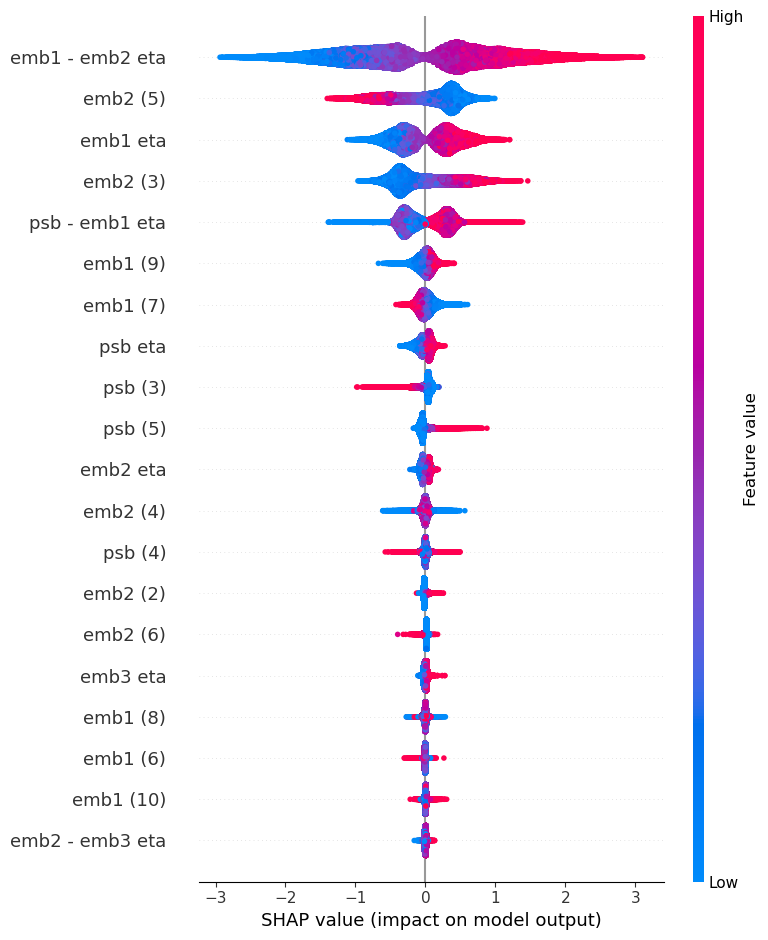

In [18]:
feature_names = [
    "psb eta",
    "emb1 eta",
    "emb2 eta",
    "emb3 eta",
    "hab1 eta",
    "psb - emb1 eta",
    "emb1 - emb2 eta",
    "emb2 - emb3 eta",
    "emb3 - hab1 eta",
    "psb (0)",
    "psb (1)",
    "psb (2)",
    "psb (3)",
    "psb (4)",
    "psb (5)",
    "psb (6)",
    "psb (7)",
    "psb (8)",
    "emb1 (0)",
    "emb1 (1)",
    "emb1 (2)",
    "emb1 (3)",
    "emb1 (4)",
    "emb1 (5)",
    "emb1 (6)",
    "emb1 (7)",
    "emb1 (8)",
    "emb1 (9)",
    "emb1 (10)",
    "emb1 (11)",
    "emb1 (12)",
    "emb1 (13)",
    "emb1 (14)",
    "emb1 (15)",
    "emb1 (16)",
    "emb2 (0)",
    "emb2 (1)",
    "emb2 (2)",
    "emb2 (3)",
    "emb2 (4)",
    "emb2 (5)",
    "emb2 (6)",
    "emb2 (7)",
    "emb2 (8)",
    "emb3 (0)",
    "emb3 (1)",
    "emb3 (2)",
    "emb3 (3)",
    "emb3 (4)",
    "emb3 (5)",
    "emb3 (6)",
    "emb3 (7)",
    "emb3 (8)",
    "hab1 (0)",
    "hab1 (1)",
    "hab1 (2)",
    "hab1 (3)",
    "hab1 (4)",
    "hab1 (5)",
    "hab1 (6)",
    "hab1 (7)",
    "hab1 (8)",
]


shap.summary_plot(shap_values, electrons.X_train, feature_names=feature_names)

# 3. Model With Input Features Version 4

In [19]:
print(get_X_4.__doc__)


    Creates inputs for model training.
    Inputs include center etas, differences between etas from different layers, energy information.
    Compared to get_X_3, this one uses differences between normalised cells,
    instead of just cells.
    The energy inputs are created in the following way:
    - first a sum over phi is taken just as in get_X_2
    - normalisation is done with respect to total deposited energy just like get_X_3
    - next, utils.fold_list_2d is used to take differences between cells symmetric around
    the middle cell, plus the middle cell itself.

    So if energy inputs after summing over phi were for example (0, 1, 2, 4, 6),
    then the input will be: (2, 4-1, 6-0) = (2, 3, 6).
    


In [20]:
# split electron data into training and testing, next train XGBoost model
electrons.train_test_split(get_X=get_X_4, get_Y=get_Y_1, test_size=0.2)
print(electrons.X_test.shape)

electrons.train_xgboost_model(params)

(87000, 38)
INFO: Trained XGBoost model; mean squared error: 1318.605927035984


1318.605927035984

In [21]:
# split photon data into training and testing, next train XGBoost model
photons.train_test_split(get_X=get_X_4, get_Y=get_Y_1, test_size=0.2)
print(photons.X_test.shape)

photons.train_xgboost_model(params)

(86975, 38)
INFO: Trained XGBoost model; mean squared error: 1374.5856507899598


1374.5856507899598

In [22]:
# split neutral pion data into training and testing, next train XGBoost model
pi0.train_test_split(get_X=get_X_4, get_Y=get_Y_1, test_size=0.2)
print(pi0.X_test.shape)

pi0.train_xgboost_model(params)

(78297, 38)
INFO: Trained XGBoost model; mean squared error: 3189.1776056250237


3189.1776056250237

In [23]:
# split charged pion data into training and testing, next train XGBoost model
pi_char.train_test_split(get_X=get_X_4, get_Y=get_Y_1, test_size=0.2)
print(pi_char.X_test.shape)

pi_char.train_xgboost_model(params)

(66161, 38)
INFO: Trained XGBoost model; mean squared error: 9275.270275406721


9275.270275406721

# 4. Model With Input Features Version 5

In [24]:
print(get_X_5.__doc__)


    Creates inputs for model training.
    Inputs include center etas, differences between etas from different layers, energy information.
    The idea is similar to get_X_4, to use differences between normalised energies symmetric about
    the middle cell.

    But this time, only certain differences are used, as it has been noticed that some inputs
    from get_X_4 do not contribute much. Therefore number of features in reduced further.
    


In [25]:
# split electron data into training and testing, next train XGBoost model
electrons.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(electrons.X_test.shape)

electrons.train_xgboost_model(params)

(87000, 22)
INFO: Trained XGBoost model; mean squared error: 1314.7785537433788


1314.7785537433788

In [26]:
# split photon data into training and testing, next train XGBoost model
photons.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(photons.X_test.shape)

photons.train_xgboost_model(params)

(86975, 22)
INFO: Trained XGBoost model; mean squared error: 1374.9357280483187


1374.9357280483187

In [27]:
# split neutral pion data into training and testing, next train XGBoost model
pi0.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(pi0.X_test.shape)

pi0.train_xgboost_model(params)

(78297, 22)
INFO: Trained XGBoost model; mean squared error: 3468.209907521194


3468.209907521194

In [28]:
# split charged pion data into training and testing, next train XGBoost model
pi_char.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(pi_char.X_test.shape)

pi_char.train_xgboost_model(params)

(66161, 22)
INFO: Trained XGBoost model; mean squared error: 9518.208520108661


9518.208520108661